# Lemon Classifier Using ML frameworks in python

### Objectives:
* import the training dataset
* preprocess the training data
* train the model using ML framework
* validate / testing accuracy
* export model for microservice deployment
* have fun and enjoy a refeshing slice of lemon py :D
# 🍋

#### ========== Elliott M. Lynch 2/8/21 ==========

## framework selection considerations
in the contemporary context of ML frameworks in 2021, pytorch appears to be highly regarded,
for the purposes of this explorative notebook, demonstrating a binary image classifer in torch would be a suitable choice for this project's framework

In [1]:
# include module dependencies
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import image
from matplotlib import pyplot
import cv2
from skimage.color import rgb2gray
from skimage import io
from IPython.display import display # to display images in ipython notebook

### import lemon dataset
* the training data was curated from duckduckgo image searches 

In [2]:
# working with directories 

dir_name = "unprocessed-training/"
root = [dir_name + root for root in os.listdir(dir_name) if root != ".DS_Store"]

""" training_set[0][:] contains positive examples & training_set[1][:] 
contains negative examples """
dataset_dir = [[],[]] 

index = -1
for branch in root:
    index += 1
    sub_dir = (os.listdir(branch))
    for img in sub_dir:
        if img != ".DS_Store":
            dataset_dir[index].append(branch + "/" + img)
print(dataset_dir[1][1])


unprocessed-training/negative/neg_img-235.png


In [3]:
# converting directory to image set 
dataset_pos = [image.imread(img, 0) for img in dataset_dir[0] if img != ".DS_Store"]
dataset_neg = [image.imread(img, 0) for img in dataset_dir[1] if img != ".DS_Store"]


### testing our array training set to make sure it has been properly converted

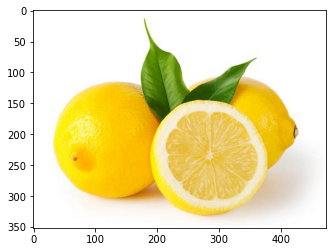

In [4]:
# display the array of pixels as an image
example = dataset_pos[0]
pyplot.imshow(example)
pyplot.show()


### experiment with manipulating an image
* funky lemons

(445, 356, 3)


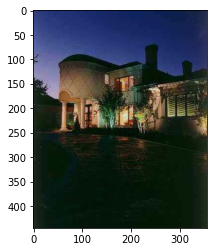

In [5]:
x = dataset_pos[1] + 1
y = np.array([[1, 2, 3], [4, 3, 2]])
print(x.shape) # print the dimension of the image
pyplot.imshow(x)
pyplot.show()

### array clip 
* clip the value of an array between a given range

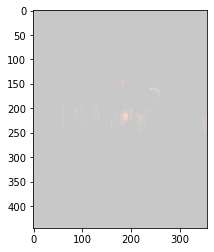

In [6]:
x1 = np.clip(x, 200, 255)
pyplot.imshow(x1)
pyplot.show()

### preprocess training data
* resize 
* greyscale
* denoise?

### Resize images

In [7]:
image_dim = 32
dataset_pos = [cv2.resize(img, dsize=(image_dim, image_dim), interpolation=cv2.INTER_CUBIC) 
                for img in dataset_pos]
dataset_neg = [cv2.resize(img, dsize=(image_dim, image_dim), interpolation=cv2.INTER_CUBIC) 
                for img in dataset_neg]

print(dataset_neg[5].shape)

(32, 32, 3)


### convert to greyscale

In [8]:
dataset_pos = [rgb2gray(img) for img in dataset_pos]
dataset_neg = [rgb2gray(img) for img in dataset_neg]

/Users/elliottlynch/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


### denoise

In [9]:
# TODO:

### display a preprocessed image

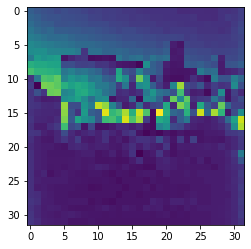

In [10]:
preprocessed_example = dataset_pos[1]
pyplot.imshow(preprocessed_example)
pyplot.show()

### unify preprocessed data set

In [11]:
X = np.array((dataset_pos + dataset_neg)) 
print(X[1].shape)

(32, 32)


### labling the dataset

In [12]:
pos_count = len(dataset_pos)
neg_count = len(dataset_neg)
pos = np.ones((pos_count, 1))
neg = np.zeros((neg_count, 1))
Y = np.vstack((pos, neg)) # combine the arrays to create a single lable vector
np.shape(Y)
print("The class for the example @ pos 222 is ", Y[222])
print(Y[222] == 1)

The class for the example @ pos 222 is  [1.]
[ True]


### useful variables

In [13]:
m = Y.size # number of examples in training set
n = image_dim ** 2 # number of features for each training examnple

In [14]:
print(m)

1395


### convert our data into feature vector representation
* we must represent the training example of the feature vector of the 40 x 40 pixel images (1600 features)

In [15]:
X_vec = np.array([x.reshape(1, n) for x in X]) # reshape each example
X_vec.shape = (m, n) # reshape to array from tensor
print(X_vec.shape)

(1395, 1024)


### reconstructing vectorized data
* we can reshape the feature vector to reconstruct the image after using x.reshape(image_dim, image_dim)

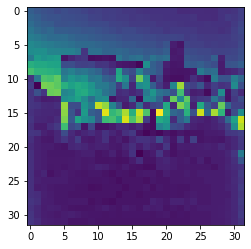

In [16]:
q = X_vec[1]
pyplot.imshow(q.reshape(image_dim, image_dim)) # reshape the feature vector back to the image
pyplot.show()

### joining labels with data 
* this part could use some work:
I need to figure out how to shuffle the data before the split 

In [17]:
X_labled = np.hstack((X_vec, Y)) # it is important to note 
#the lable has been added as a feature for the purposes of shuffling the data

### shuffling the data

In [18]:
np.random.shuffle(X_labled)

### seperating shuffled examples and labels 

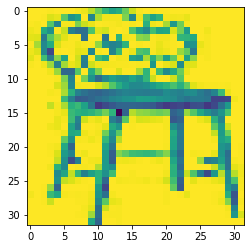

In [19]:
X_vec = X_labled[:, :-1]
Y = X_labled[:, -1] 
test_img = X_vec[1]
pyplot.imshow(test_img.reshape(image_dim, image_dim)) # reshape the feature vector back to the image
pyplot.show()

### splitting the data train / validation / test and respective labels
* adhearing to the 60/20/20 split

In [20]:
X_train = X_vec[0: int(m * 0.6)]
Y_train = Y[0: int(m * 0.6)]
X_val = X_vec[int(m * 0.6): int(m * 0.8)]
Y_val = Y[int(m * 0.6): int(m * 0.8)]
X_test = X_vec[int(m * 0.8)::]
Y_test = Y[int(m * 0.8)::]
print(X_val[-1] == X_test[0])

[False False False ... False False False]


### sanity check time, lets make sure the split is mutually exclusive

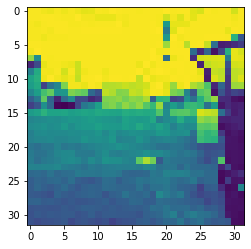

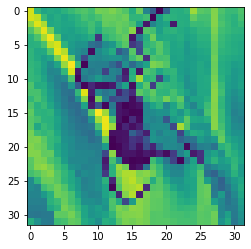

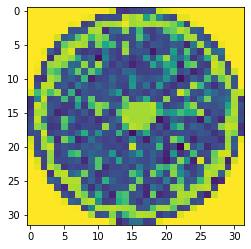

In [21]:
test0 = X_train[0].reshape(image_dim, image_dim)
test1 = X_val[-1].reshape(image_dim, image_dim)
test2 = X_test[0].reshape(image_dim, image_dim)
pyplot.imshow(test0)
pyplot.show()
pyplot.imshow(test1)
pyplot.show()
pyplot.imshow(test2)
pyplot.show()
x1 = [1, 2 ,3, 4]

## wait a minute, theres a better way?
* data input using torch dataloader
* more efficient memory managment
https://www.youtube.com/watch?v=ZoZHd0Zm3RY&feature=share

In [22]:
# defining a class for lemon data which extends 
# the torch Dataset class

class LemonData(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))
        
        if self.transform:
            image = self.transform(image)
            
        return (image, y_label)

### the dataset object

In [81]:
# config transformation procedure - so cool!!!
transform = transforms.Compose([transforms.ToPILImage(),transforms.Grayscale(num_output_channels=1), transforms.Resize((image_dim, image_dim)),
                                transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# load data      
#dataset = LemonData(csv_file = "LemonData.csv", root_dir = "LemonData/", transform = transforms.ToTensor())
dataset = LemonData(csv_file = "LemonData.csv", root_dir = "LemonData/", transform = transform)

# useful variable 
m = len(dataset)
print(int(m * 0.8) + int(m * 0.2) + 1)
print(dataset.annotations)

# hacky fix for splitting odd/even numbered datasets
if m % 2 is 0:
    train_set, test_set = torch.utils.data.random_split(dataset, [int(m * 0.8), int(m * 0.2)])
    test_m = int(m * 0.2)
else:
    train_set, test_set = torch.utils.data.random_split(dataset, [int(m * 0.8), int(m * 0.2) + 1])
    test_m = int(m * 0.2) + 1

991
       neg_img-0.png  0
0      neg_img-1.png  0
1      neg_img-2.png  0
2      neg_img-3.png  0
3      neg_img-4.png  0
4      neg_img-5.png  0
..               ... ..
986  pos_img-584.png  1
987  pos_img-585.png  1
988  pos_img-586.png  1
989  pos_img-587.png  1
990  pos_img-588.png  1

[991 rows x 2 columns]


### setting the device

In [24]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Hyperparameters

In [79]:
batch_size = 4 
num_epochs = 100
alpha = 0.001 # learning rate
in_channels = 1

#### following along the pytorch documentation of data
* trainloader

In [37]:
trainloader = torch.utils.data.DataLoader(train_set, batch_size = 32, shuffle = True, num_workers = 2)
testloader = torch.utils.data.DataLoader(test_set, batch_size = 32, shuffle = True, num_workers = 2)

classes = ("Not Lemon", "Lemon")

### lets take a look out our torch loaded images!

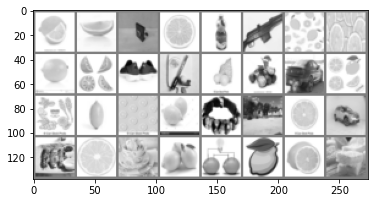

Lemon Lemon Not Lemon Lemon


In [38]:
# functions to show an image
import matplotlib.pyplot as plt
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Defining a convolutional Neural Network Architecture (ConVNet)

In [76]:

# neural network defined for one channel image 
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


### Define a Lose function and optimizer

In [77]:
import torch.optim as optim 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),
                      lr = alpha, momentum = 0.9) 

In [41]:
# using enumerate 
for i, item in enumerate([1,2,3]):
    print(i, item)

0 1
1 2
2 3


### train the network

In [80]:
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        print(inputs.shape)
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
    print(epoch)
print('Finished Training')

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([24, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 32, 32])
torch.Size([32, 1, 3

### saving the model

In [82]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

## validation / performance testing

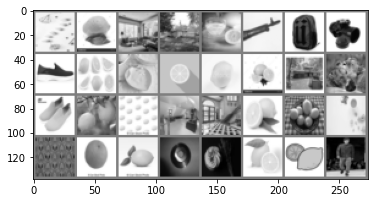

GroundTruth:  Lemon Lemon Not Lemon Not Lemon


In [83]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [84]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [85]:
outputs = net(images)

In [86]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:  Lemon Lemon Not Lemon Not Lemon


### testing on the entire dataset 

In [87]:
m_test = iter(testloader)
for i in testloader:
    for x in i: 
        print(x.shape)
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(('Accuracy of the network on the {} test images: %d %%' % (
    100 * correct / total)).format(10))

torch.Size([32, 1, 32, 32])
torch.Size([32])
torch.Size([32, 1, 32, 32])
torch.Size([32])
torch.Size([32, 1, 32, 32])
torch.Size([32])
torch.Size([32, 1, 32, 32])
torch.Size([32])
torch.Size([32, 1, 32, 32])
torch.Size([32])
torch.Size([32, 1, 32, 32])
torch.Size([32])
torch.Size([7, 1, 32, 32])
torch.Size([7])
Accuracy of the network on the 10 test images: 80 %


## results 

### testing PIL images

In [ ]:
im = Image.open(training_set[0][1])
im_rot = im.rotate(45)
display(im_rot)

## exporting the model

## ML as a microservice through restful API's on the cloud

## Conclusion 
* thank you :D